In [ ]:
from google.colab import files
uploaded = files.upload()
# Upload the dataset given in the dataset which can also be downloaded from the link below:-
# https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset?select=nation_level_daily.csv

Saving main_dataset.csv to main_dataset.csv


In [ ]:
import pandas as pd
from matplotlib import pyplot as py
import statsmodels as m
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("main_dataset.csv",index_col=0,parse_dates=True,squeeze=True)
print(df.head())
print(df.tail())

           Date  Daily Confirmed  ...  Daily Deceased  Total Deceased
0   30 January                 1  ...               0               0
1   31 January                 0  ...               0               0
2  01 February                 0  ...               0               0
3  02 February                 1  ...               0               0
4  03 February                 1  ...               0               0

[5 rows x 7 columns]
         Date  Daily Confirmed  ...  Daily Deceased  Total Deceased
173  21 July             39170  ...             671           28772
174  22 July             45601  ...            1130           29902
175  23 July             48443  ...             755           30657
176  24 July             48888  ...             763           31420
177  25 July             50072  ...             703           32123

[5 rows x 7 columns]


In [ ]:

new_df = df[["Date","Daily Confirmed"]][78:]
print(new_df.head())

         Date  Daily Confirmed
78  17 April               922
79  18 April              1371
80  19 April              1580
81  20 April              1239
82  21 April              1537


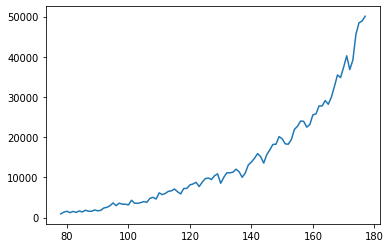

In [ ]:

py.plot(new_df["Daily Confirmed"])
py.show()

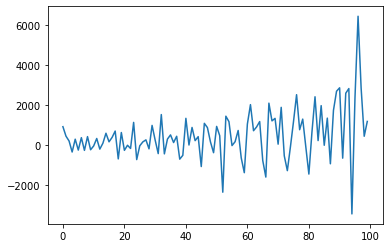

In [ ]:

new_col = new_df["Daily Confirmed"].reset_index()
dC = new_col["Daily Confirmed"]
dC_diff1 = dC.diff().fillna(dC)
py.plot(dC_diff1)
py.show()

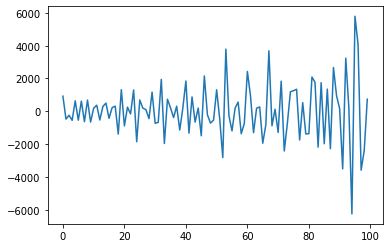

In [ ]:

dC_diff2 = dC_diff1.diff().fillna(dC_diff1)
py.plot(dC_diff2)
py.show()

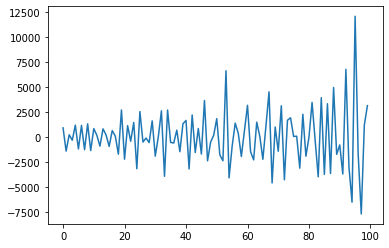

In [ ]:

dC_diff3 = dC_diff2.diff().fillna(dC_diff2)
py.plot(dC_diff3)
py.show()

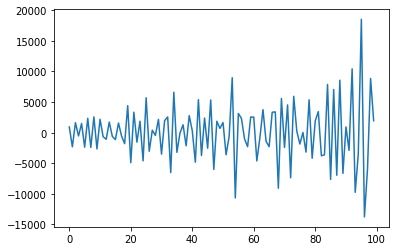

In [ ]:

dC_diff4 = dC_diff3.diff().fillna(dC_diff3)
py.plot(dC_diff4)
py.show()

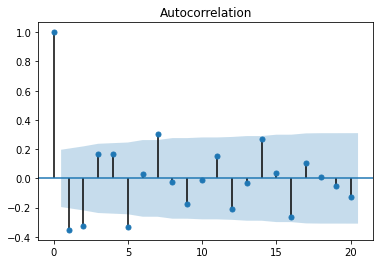

In [ ]:

plot_acf(dC_diff2)
py.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


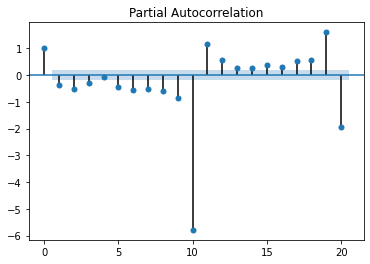

In [ ]:

plot_pacf(dC_diff2)
py.show()

In [ ]:

arima_cases_analysis = ARIMA(dC,order=(5,2,1)).fit(transparams=False)
print(arima_cases_analysis.summary())

                             ARIMA Model Results                              
Dep. Variable:     D2.Daily Confirmed   No. Observations:                   98
Model:                 ARIMA(5, 2, 1)   Log Likelihood                -815.659
Method:                       css-mle   S.D. of innovations            972.009
Date:                Fri, 10 Dec 2021   AIC                           1647.317
Time:                        17:38:08   BIC                           1667.997
Sample:                             2   HQIC                          1655.682
                                                                              
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       18.2107      7.887      2.309      0.023       2.753      33.668
ar.L1.D2.Daily Confirmed    -0.3179      0.095     -3.345      0.001      -0.504      -0.

95    37631.615142
96    43079.909533
97    46273.472638
98    47972.402106
99    51188.466903
dtype: float64


Data Collected from 17 April to 25 July of daily confirmed covid-cases in India


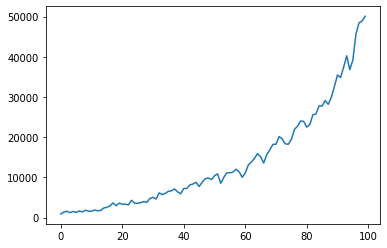

Predicted Data from 17 April to 25 July of daily confirmed covid-cases in India
Based on the Previously collected data


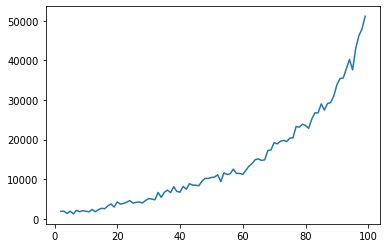

In [ ]:
arima_model_prediction= arima_cases_analysis.predict(start=2,end=99,typ="levels")
print("Data Collected from 17 April to 25 July of daily confirmed covid-cases in India")
py.plot(dC)
py.show()
print("Predicted Data from 17 April to 25 July of daily confirmed covid-cases in India")
print("Based on the Previously collected data")
py.plot(arima_model_prediction)
py.show()